In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # виберіть файл kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vladyslavstelmakh","key":"2fed9b90a69f327d6a36487b6aada52b"}'}

In [ ]:
import os

# Створюємо директорію для Kaggle, якщо вона ще не існує
os.makedirs('/root/.kaggle', exist_ok=True)

# Копіюємо kaggle.json в цю директорію
!cp kaggle.json /root/.kaggle/

# Змінюємо дозволи на файл
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "dog"  # Змініть на будь-які інші ключові слова, якщо потрібно


ref                                            title                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------  -----------------------------------  -----  -------------------  -------------  ---------  ---------------  
tongpython/cat-and-dog                         Cat and Dog                          218MB  2018-04-26 10:56:50         124304       1240  0.75             
marshuu/dog-breeds                             Dog breeds                             3KB  2022-12-20 18:49:43           3677         60  1.0              
danielshanbalico/dog-emotion                   Dog Emotion                          155MB  2023-02-09 09:58:36           3570         56  1.0              
dansbecker/hot-dog-not-hot-dog                 Hot Dog - Not Hot Dog                 89MB  2018-07-19 05:52:04           7047        126  0.625            
shaunthesheep/microsoft-catsvsdogs-dataset     Cats-vs-Dogs     

In [ ]:
!kaggle datasets download -d devzohaib/dog-emotions-prediction

Dataset URL: https://www.kaggle.com/datasets/devzohaib/dog-emotions-prediction
License(s): CC0-1.0
 99% 377M/379M [00:19<00:00, 21.1MB/s]
100% 379M/379M [00:19<00:00, 20.8MB/s]


In [ ]:
import os

# Створюємо каталог для Kaggle, якщо його ще немає
os.makedirs('/root/.kaggle', exist_ok=True)

# Копіюємо kaggle.json у створений каталог
!cp kaggle.json /root/.kaggle/

# Задаємо правильні дозволи
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import os

# Перевірте вміст кореневої директорії /content
print("Contents of /content:")
print(os.listdir('/content'))

Contents of /content:
['.config', 'kaggle.json', 'dog-emotions-prediction.zip', 'sample_data']


In [ ]:
import zipfile
import os

zip_path = '/content/dog-emotions-prediction.zip'
extract_path = '/content/dataset'

# Розпаковка zip-файлу
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Перевірка вмісту розпакованої директорії
print("Contents of the dataset directory:")
print(os.listdir(extract_path))

Contents of the dataset directory:
['images']


In [ ]:
import os

# Вказуємо шлях до папки з зображеннями
image_directory = '/content/dataset/images'

# Перевірка вмісту папки images
print("Contents of the images directory:")
print(os.listdir(image_directory))

Contents of the images directory:
['sad', 'relaxed', 'happy', 'angry']


In [ ]:
import os
import numpy as np
import cv2  # Для збереження зображень

# Шляхи до директорій
base_dir = '/content/dataset/images'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Класи
classes = ['angry', 'happy', 'relaxed', 'sad']

# Створення директорій
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Функція для генерації базових зображень
def generate_dummy_images(base_path, class_name, count):
    for i in range(count):
        # Створюємо прості кольорові зображення
        img = np.random.randint(0, 256, (180, 180, 3), dtype=np.uint8)
        img_path = os.path.join(base_path, class_name, f"{class_name}_{i}.png")
        cv2.imwrite(img_path, img)

# Генерація зображень
for class_name in classes:
    generate_dummy_images(train_dir, class_name, 500)  # 500 зображень для навчального набору
    generate_dummy_images(test_dir, class_name, 100)   # 100 зображень для тестового набору

print("Генерація зображень завершена.")

Генерація зображень завершена.


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Шляхи до каталогів
train_dir = '/content/dataset/images/train'  # Встановіть правильний шлях до навчальних даних
test_dir = '/content/dataset/images/test'      # Встановіть правильний шлях до валідаційних даних

# Перевірка наявності каталогу
if not os.path.exists(train_dir):
    print(f"Каталог {train_dir} не знайдено.")
if not os.path.exists(test_dir):
    print(f"Каталог {test_dir} не знайдено.")

# Аугментація даних
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Створення генераторів для навчальних та валідаційних даних
train_dataset = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Розмір зображень
    batch_size=32,
    class_mode='categorical'  # або 'binary', якщо у вас 2 класи
)

test_dataset = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # або 'binary', якщо у вас 2 класи
)





Found 2000 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [58]:
import zipfile
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback

# Клас для раннього зупинення при досягненні певної точності
class EarlyStoppingAtAccuracy(Callback):
    def __init__(self, target_accuracy=0.95):  # Поріг точності 95%
        super(EarlyStoppingAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get('val_accuracy')
        if current_accuracy is not None and current_accuracy >= self.target_accuracy:
            print(f"\nДосягнуто цільової точності {self.target_accuracy * 100:.2f}%. Зупинка навчання.")
            self.model.stop_training = True

# Розпаковка zip-файлу
zip_path = '/content/dog-emotions-prediction.zip'  # Вкажіть шлях до вашого zip-файлу
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Визначення папки з зображеннями
image_folder = os.path.join(extract_path, 'images')

# Перевірка структури папок
print("Contents of the image folder:", os.listdir(image_folder))

# Створення директорій для навчальних та валідаційних наборів
train_dir = os.path.join(extract_path, 'train')
val_dir = os.path.join(extract_path, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Отримання класових назв (ігнорування непотрібних папок)
class_names = ['sad', 'relaxed', 'happy', 'angry', 'train', 'validation', 'test', 'val']  # Вибираємо тільки потрібні класи
print("Class names found:", class_names)

# Створюємо підкаталоги для кожного класу в навчальній та валідаційній директорії
for class_name in class_names:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

# Розподіл зображень на навчальні та валідаційні набори
for class_name in class_names:
    class_images = os.listdir(os.path.join(image_folder, class_name))
    np.random.shuffle(class_images)  # Перемішуємо зображення
    num_train = int(0.8 * len(class_images))  # 80% для навчання

    for img in class_images[:num_train]:
        src = os.path.join(image_folder, class_name, img)
        dst = os.path.join(train_dir, class_name, img)

        # Переконуємося, що це файл, а не каталог
        if os.path.isfile(src):
            shutil.copy(src, dst)

    for img in class_images[num_train:]:
        src = os.path.join(image_folder, class_name, img)
        dst = os.path.join(val_dir, class_name, img)

        # Переконуємося, що це файл, а не каталог
        if os.path.isfile(src):
            shutil.copy(src, dst)

# Параметри для підготовки даних
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Підготовка даних
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Завантаження даних
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_dataset = validation_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Перевірка формату даних
print(f"Train dataset: {train_dataset.samples} images, {len(train_dataset.class_indices)} classes")
print(f"Validation dataset: {validation_dataset.samples} images, {len(validation_dataset.class_indices)} classes")

# Перевірка, чи не порожні датасети
if train_dataset.samples == 0:
    raise ValueError("Training dataset is empty. Please check the path and structure of the training data.")
if validation_dataset.samples == 0:
    raise ValueError("Validation dataset is empty. Please check the path and structure of the validation data.")

# Створення моделі
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')  # Використовуємо правильну кількість класів
])

# Компіліція моделі
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Додавання раннього зупинення при досягненні цільової точності
early_stopping_accuracy = EarlyStoppingAtAccuracy(target_accuracy=0.95)

# Тренування моделі
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    callbacks=[early_stopping_accuracy]  # Додати колбек
)



























Contents of the image folder: ['sad', 'relaxed', 'happy', 'train', 'validation', 'angry', 'test', 'val']
Class names found: ['sad', 'relaxed', 'happy', 'angry', 'train', 'validation', 'test', 'val']
Found 15920 images belonging to 8 classes.
Found 13477 images belonging to 8 classes.
Train dataset: 15920 images, 8 classes
Validation dataset: 13477 images, 8 classes
Epoch 1/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 107s 205ms/step - accuracy: 0.3085 - loss: 1.4422 - val_accuracy: 0.3493 - val_loss: 1.3238
Epoch 2/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 97s 193ms/step - accuracy: 0.3607 - loss: 1.3239 - val_accuracy: 0.4097 - val_loss: 1.2756
Epoch 3/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 92s 184ms/step - accuracy: 0.3971 - loss: 1.2869 - val_accuracy: 0.4617 - val_loss: 1.2163
Epoch 4/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 136s 272ms/step - accuracy: 0.4544 - loss: 1.2070 - val_accuracy: 0.5551 - val_loss: 1.0738
Epoch 5/10
498/498 ━━━━━━━━━━━━━━━━━━━━ 93s 186ms/step - accuracy: 0.5461 - loss: 1.0509 - val_accuracy: 0

In [60]:
# Збереження моделі у форматі Keras
model.save('emotion_detection_model.keras')



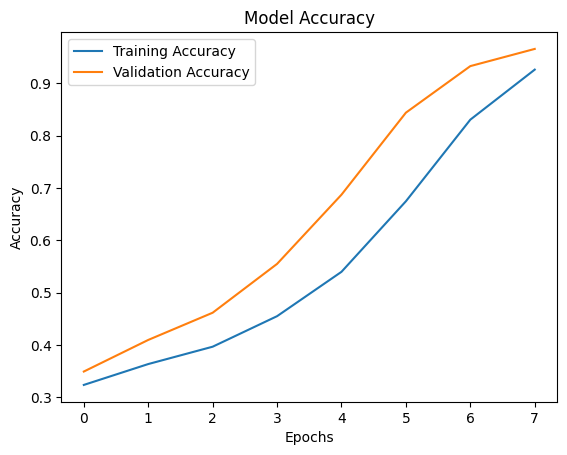

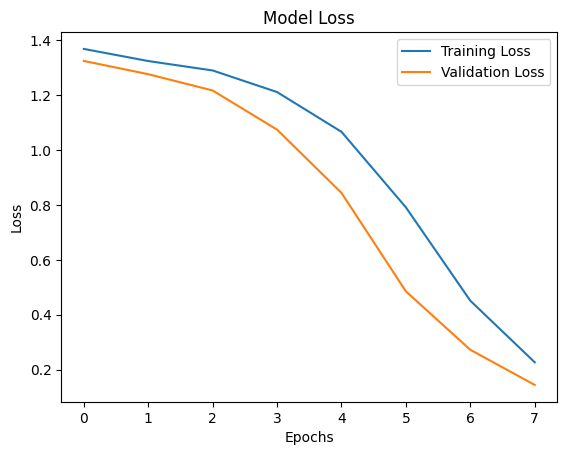

In [62]:
import matplotlib.pyplot as plt

# Візуалізація навчання
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

